In [1]:
import numpy as np
import scipy.linalg as splin
from scipy.integrate import LSODA, solve_ivp
import matplotlib.pyplot as plt

from consts import *
from lyapunov import *
from pac import *
from potential import *

from manifold import *

In [2]:
def EPS(S, tol):
    # Poincare section at x = 1 - mu
    x_s = 1 - muEM
    # In theory we place the section plane at x and call it a day, 
    # but in practice we need to account for the fact that the section
    # cannot be infinite on the y axis or it catches unwanted solutions
    # So we limit y to +/- 0.25, well inside the ZVC at 1-mu

    y_lim = 0.25

    # Compute the distance to the section
    dist_x = np.abs(S[0] - x_s)
    dist_y = np.abs(S[1] - y_lim)

    if dist_x < tol and abs(S[1]) < y_lim:
        return True
    else:
        return False
    
def EPS2(S, tol):
    # Poincare section at y = 0
    # We limit the x axis to a range [0.5 1-mu]
    x_lim_i = 0.5
    x_lim_s = 1-muEM

    # Compute the distance to the section
    if abs(S[1]) < tol and S[0] > x_lim_i and S[0] < x_lim_s:
        return True
    else:
        return False

def EPS3(S, tol):
    # Poincare section at y = 0
    # We limit the x axis to a range [1-mu 1.2]
    x_lim_i = 1-muEM
    x_lim_s = 2

    # Compute the distance to the section
    if abs(S[1]) < tol and S[0] > x_lim_i and S[0] < x_lim_s:
        return True
    else:
        return False


In [3]:
# Load orbits from file
L1_0 = load_orbit("out/L1_0.npz")
L1_1 = load_orbit("out/L1_1.npz")

L2_0 = load_orbit("out/L2_0.npz")
L2_1 = load_orbit("out/L2_1.npz")

L1_orbits = [L1_0, L1_1]
L2_orbits = [L2_0, L2_1]

In [4]:
manL1 = Manifold(L1_0)
_ = manL1.compute_manifold(100)

In [5]:
manL2 = Manifold(L2_0)
_ = manL2.compute_manifold(100)

In [6]:
cutsL1, sursL1, cutuL1, suruL1 = manL1.surface_hit(EPS, 1e-3)

cutsL2, sursL2, cutuL2, suruL2 = manL2.surface_hit(EPS, 2e-3)

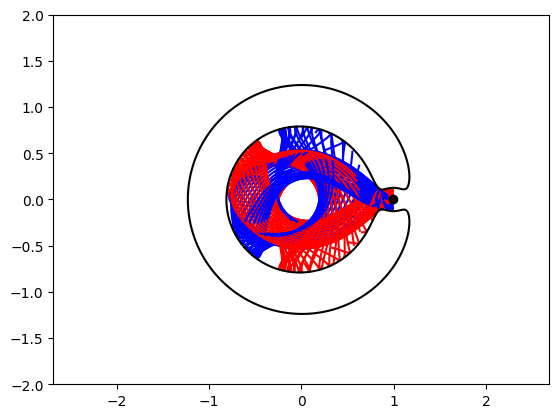

In [7]:
# Plot the cuts
plt.figure()
for i in range(60):
    plt.plot(cutsL1[i][0], cutsL1[i][1], "r",)
    plt.plot(cutuL1[i][0], cutuL1[i][1], "b",)

manL1.plot_ZVC()
plt.axis("equal")
plt.plot([1-muEM], [0], "ko")
plt.show()

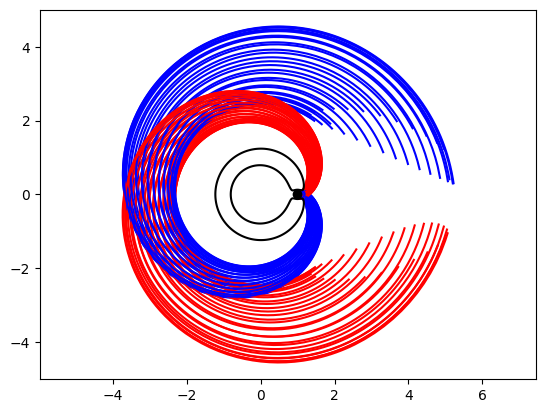

In [8]:
plt.figure()
for i in range(60):
    plt.plot(cutsL2[i][0], cutsL2[i][1], "r",)
    plt.plot(cutuL2[i][0], cutuL2[i][1], "b",)

manL2.plot_ZVC()
plt.axis("equal")
plt.plot([1-muEM], [0], "ko")
plt.show()

### [X M E]

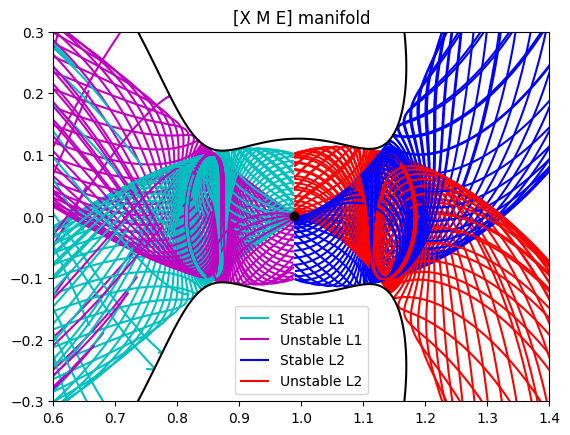

In [9]:
plt.figure()
for i in range(80):
    if i == 0:
        plt.plot(cutsL1[i][0], cutsL1[i][1], "c", label="Stable L1")
        plt.plot(cutuL1[i][0], cutuL1[i][1], "m", label="Unstable L1")
        plt.plot(cutsL2[i][0], cutsL2[i][1], "b", label="Stable L2")
        plt.plot(cutuL2[i][0], cutuL2[i][1], "r", label="Unstable L2")
    else:
        plt.plot(cutsL1[i][0], cutsL1[i][1], "c")
        plt.plot(cutuL1[i][0], cutuL1[i][1], "m")
        plt.plot(cutsL2[i][0], cutsL2[i][1], "b")
        plt.plot(cutuL2[i][0], cutuL2[i][1], "r")
manL1.plot_ZVC()
plt.plot([1-muEM], [0], "ko")
plt.xlim(0.6, 1.4)
plt.ylim(-0.3, 0.3)
plt.legend()
plt.title("[X M E] manifold")
plt.show()

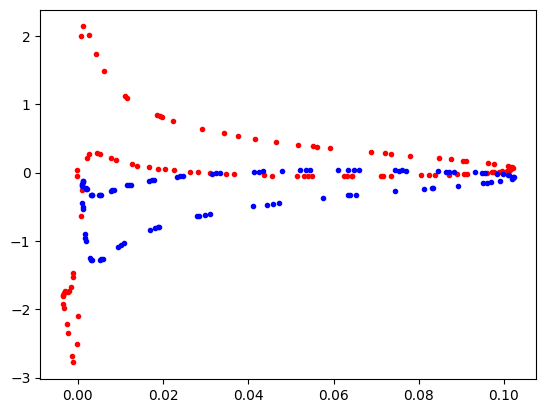

In [10]:
# Plots suruL2 and sursL1
plt.figure()
# Plot y-v
plt.plot(sursL1[:, 1], sursL1[:, 3], "ro", label="Stable L1", markersize=3)
plt.plot(suruL2[:, 1], suruL2[:, 3], "bo", label="Unstable L2", markersize=3)
plt.plot
plt.show()


### [E M E]

In [11]:
cutsL1_EPS3, sursL1_EPS3, cutuL1_EPS3, suruL1_EPS3 = manL1.surface_hit(EPS3, 1e-3)

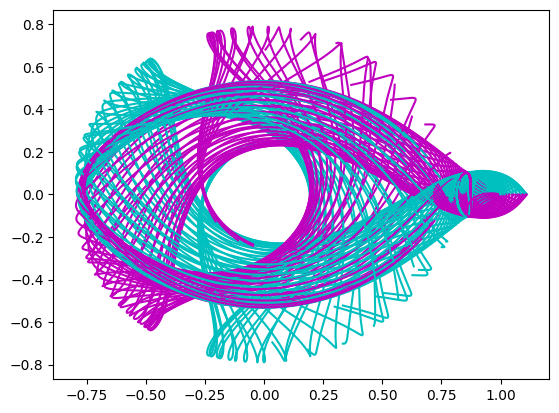

In [12]:
plt.figure()    
for i in range(80):
    if i == 0:
        plt.plot(cutsL1_EPS3[i][0], cutsL1_EPS3[i][1], "c", label="Stable L1")
        plt.plot(cutuL1_EPS3[i][0], cutuL1_EPS3[i][1], "m", label="Unstable L1")
    else:
        plt.plot(cutsL1_EPS3[i][0], cutsL1_EPS3[i][1], "c")
        plt.plot(cutuL1_EPS3[i][0], cutuL1_EPS3[i][1], "m")
    

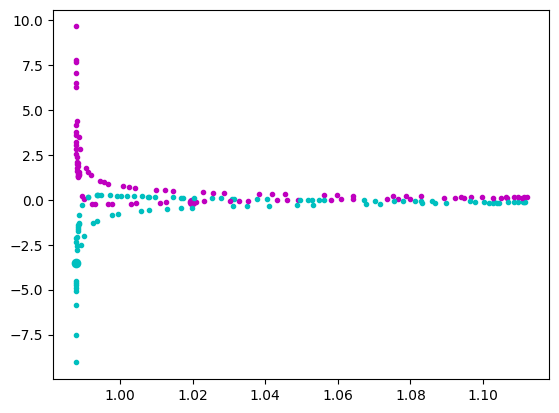

In [13]:

sursL1_EPS3 = [sursL1_EPS3[i] for i in range(len(sursL1_EPS3)) if abs(sursL1_EPS3[i][2]) < 10]
suruL1_EPS3 = [suruL1_EPS3[i] for i in range(len(suruL1_EPS3)) if abs(suruL1_EPS3[i][2]) < 10]
plt.figure()
for i in range(len(suruL1_EPS3)):
    if i == 0:
        plt.plot(sursL1_EPS3[i][0], sursL1_EPS3[i][2], "co", label="Stable L1")
        plt.plot(suruL1_EPS3[i][0], suruL1_EPS3[i][2], "mo", label="Unstable L1")
    else:
        plt.plot(sursL1_EPS3[i][0], sursL1_EPS3[i][2], "co", markersize=3)
        plt.plot(suruL1_EPS3[i][0], suruL1_EPS3[i][2], "mo",  markersize=3)

plt.show()

### [X M X]

In [14]:
cutsL2_EPS2, sursL2_EPS2, cutuL2_EPS2, suruL2_EPS2 = manL2.surface_hit(EPS2, 1e-3)

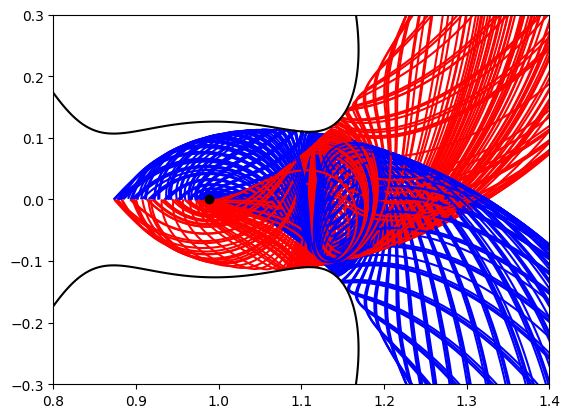

In [15]:
plt.figure()
for i in range(len(cutsL2_EPS2)):
    plt.plot(cutsL2_EPS2[i][0], cutsL2_EPS2[i][1], "r",)
    plt.plot(cutuL2_EPS2[i][0], cutuL2_EPS2[i][1], "b",)
plt.plot([1-muEM], [0], "ko")
plt.xlim(0.8, 1.4)
plt.ylim(-0.3, 0.3)

manL2.plot_ZVC()
plt.show()

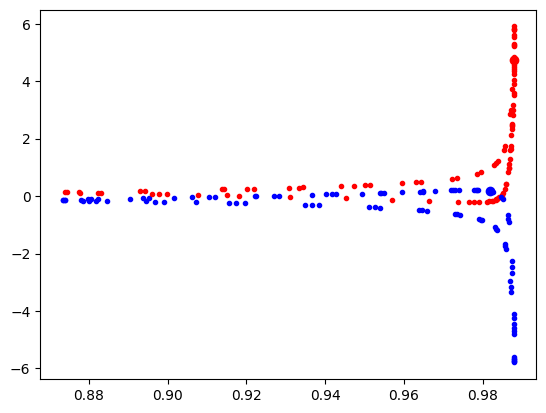

In [16]:
# Plots sursL2_EPS2
plt.figure()
for i in range(len(sursL2_EPS2)):
    if i == 0:
        plt.plot(sursL2_EPS2[i][0], sursL2_EPS2[i][2], "ro", label="Stable L2")
        plt.plot(suruL2_EPS2[i][0], suruL2_EPS2[i][2], "bo", label="Unstable L2")
    else:
        plt.plot(sursL2_EPS2[i][0], sursL2_EPS2[i][2], "ro", markersize=3)
        plt.plot(suruL2_EPS2[i][0], suruL2_EPS2[i][2], "bo", markersize=3)
plt.show()
